# Machine Learning Lab - 1

Name : `Ayush Panchal`

Roll No : `DS13`

Information of notebook : In this notebook we will be taking a project to understand machine learning concepts.

> In this we will learn about

* Loading of data.
* Describing the data.
* Missing value handling.
* Cleaning the data.
* visualization data
* Splitting the data.

> Technologies we will be using

* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-Learn

In [ ]:
# Data Wrangling libs
import numpy as np
import pandas as pd

# Vizualization libs
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing libs
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Splitting dataset
from sklearn.model_selection import train_test_split

# Model Training Algorithms
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation libs
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Understanding the data

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.

> The attributes related with eating habits are:

* Frequent consumption of high caloric food (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Consumption of water daily (CH20)
* Consumption of alcohol (CALC)

> The attributes related with the physical condition are:

* Calories consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Transportation used (MTRANS)

> variables obtained :

* Gender
* Age
* Height
* Weight.

> NObesity values are:

* Underweight Less than 18.5
* Normal 18.5 to 24.9
* Overweight 25.0 to 29.9
* Obesity I 30.0 to 34.9
* Obesity II 35.0 to 39.9
* Obesity III Higher than 40

In [ ]:
!git clone https://github.com/AyushPanchal/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 11.10 MiB | 24.23 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
# Loading the dataset
data = pd.read_csv("/content/datasets/ObesityDataSet.csv")
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [ ]:
data.info()
# Checking weather a dataset contains null values or not and identifying the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

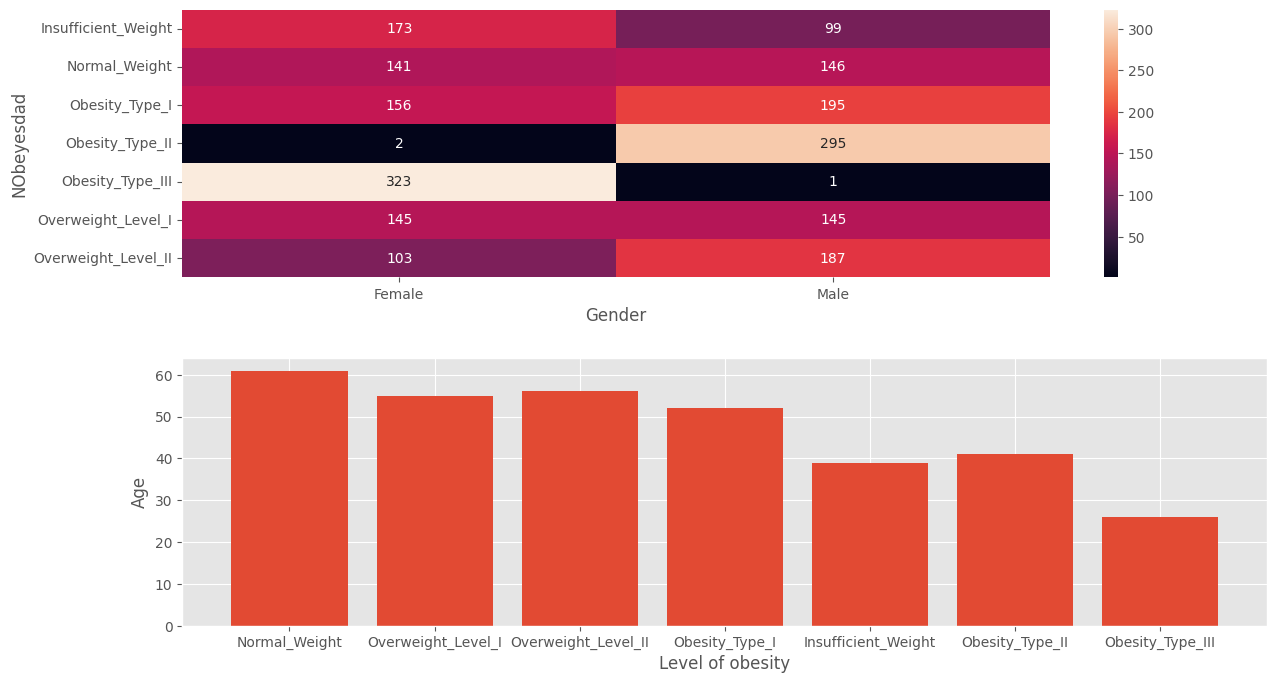

In [ ]:
# Changing the theme of plots
plt.style.use("ggplot")

fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(14, 8))

fig.subplots_adjust(hspace=0.3)

sns.heatmap(pd.crosstab(data["NObeyesdad"],data["Gender"]),annot=True, fmt='g', ax=ax[0]);

ax[1].bar(data["NObeyesdad"], data["Age"]);
ax[1].set_xlabel("Level of obesity");
ax[1].set_ylabel("Age");

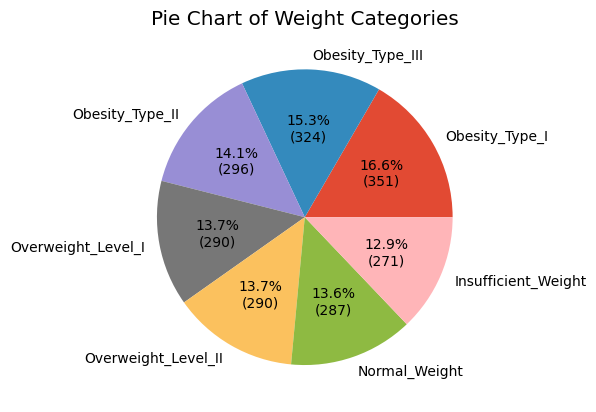

In [ ]:
labels = pd.DataFrame(data["NObeyesdad"].value_counts()).index

pie_data = data["NObeyesdad"].value_counts()
plt.pie(pie_data, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100 * sum(pie_data))})")

plt.title("Pie Chart of Weight Categories");

# 3. Encoding the categorical features using `OneHotEncoder()`

In [ ]:
np.random.seed(8)

X = data.drop("NObeyesdad",axis=1)
y = data["NObeyesdad"]

categorical_features = ["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)

# 4. Splitting the dataset into train and test sets.

In [ ]:
np.random.seed(8)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

# 5. Creating evalution metrics
* we can also use `classification_report()`

In [ ]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds,average="macro")
    recall = recall_score(y_true, y_preds,average="macro")
    f1 = f1_score(y_true, y_preds,average="macro")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

# 6. Training begins ...
### I have tried multiple classifiers
* LinearSVC()
* SVC()
* LogisticRegression()

But `RandomForestClassifier()` gives best results.

In [ ]:
np.random.seed(8)

model = RandomForestClassifier()
model.fit(X_train,y_train);

# 7. Evaluation

### Using our own `evaluate_preds()`

In [ ]:
y_preds = model.predict(X_test)
evaluate_preds(y_test,y_preds)

Accuracy: 95.04%
Precision: 0.95
Recall: 0.95
F1 score: 0.95


### Using `classification_report()`

In [ ]:
print(classification_report(y_test,y_preds))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.94      0.96        51
      Normal_Weight       0.79      0.92      0.85        61
     Obesity_Type_I       1.00      1.00      1.00        62
    Obesity_Type_II       1.00      1.00      1.00        68
   Obesity_Type_III       1.00      1.00      1.00        67
 Overweight_Level_I       0.90      0.92      0.91        48
Overweight_Level_II       1.00      0.86      0.93        66

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.96      0.95      0.95       423



### Using `ConfusionMatrixDisplay()`

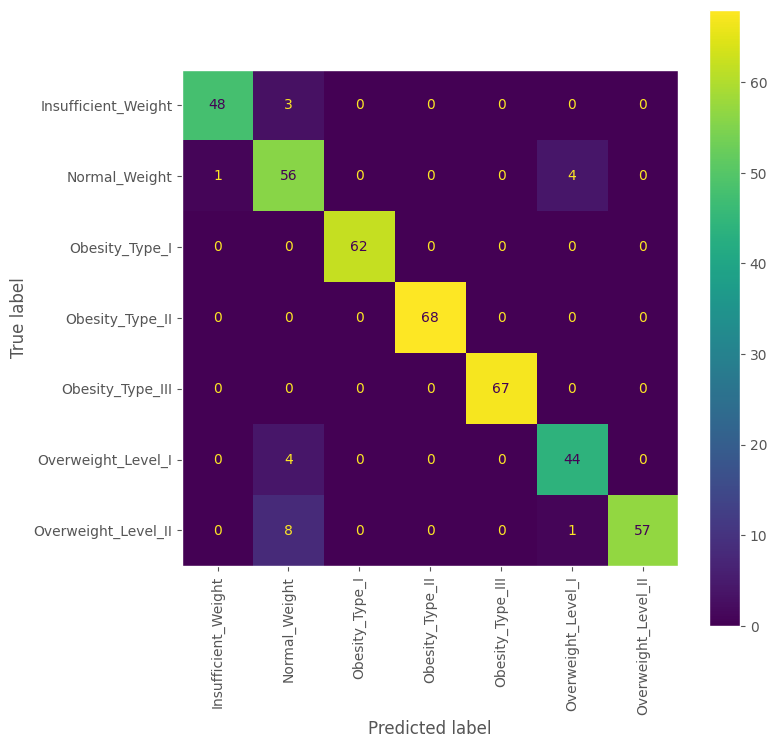

In [ ]:
fig , ax  = plt.subplots(figsize = (8,8))
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds,ax=ax);
plt.grid(False)
plt.xticks(rotation=90);

# 8. Conclusion

### `RandomForestClassifier()` gives best performance.
### Encoding categorical features plays crucial role in model's performance
### Choosing the right estimator for your problem defination becomes vital task during model training